# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

## Overview Dataset Startup

Dataset ini berisi informasi mengenai berbagai startup global dengan karakteristik beragam. Terdiri dari 9 kolom yang mencakup informasi kunci seperti industri, metrik finansial, dan pertumbuhan. 

Dataset ini akan digunakan dalam analisis clustering untuk mengkategorikan startup berdasarkan profil risiko-return mereka, membantu investor dalam membuat keputusan investasi yang lebih informed.

**Fitur-fitur:**

*   **Informasi Identitas:** Startup Nname, Industry, Country
*   **Metrik Keuangan:** Investment Amount (USD), Valuation (USD)
*   **Indikator Performa:** Growth Rate, Funding Rounds, Number of Investor
*   **Data Temporal:** Year Founded

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import  RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
import pingouin as pg
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Load the dataset
filename = 'Dataset_clustering.csv'

# Load data from CSV file
try:
    df = pd.read_csv(filename)
    print("Data loaded successfully.")
    display(df.head())
except FileNotFoundError:
    print(f"File not found: {filename}")
except Exception as e:
    print(f"An error occurred: {e}")


Data loaded successfully.


,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%)
0,Startup_1,Blockchain,8,1.335166e+09,6.621448e+09,50,Germany,2012,77.10
1,Startup_2,SaaS,2,2.781498e+09,8.363214e+09,36,UK,2006,105.52
2,Startup_3,EdTech,10,3.309032e+09,1.548270e+10,39,Singapore,2016,190.47
3,Startup_4,Fintech,5,4.050196e+09,1.268253e+10,44,France,2021,9.44
4,Startup_5,EdTech,9,1.645080e+09,6.887966e+09,48,India,2011,192.00


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Try loading the data and handle potential errors
try:
    df = pd.read_excel(filename)
    print("Data loaded successfully.\n")
    
    # Understanding Data Structures
    # Review the number of rows and columns in the dataset
    print("Jumlah Baris dan Kolom:")
    print(f"Baris: {df.shape[0]}, Kolom: {df.shape[1]}\n")
    
    # Review the data type in each column
    print("Jenis Data di Setiap Kolom:")
    print(df.dtypes)
    
except FileNotFoundError:
    print(f"File not found: {filename}")
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: Excel file format cannot be determined, you must specify an engine manually.


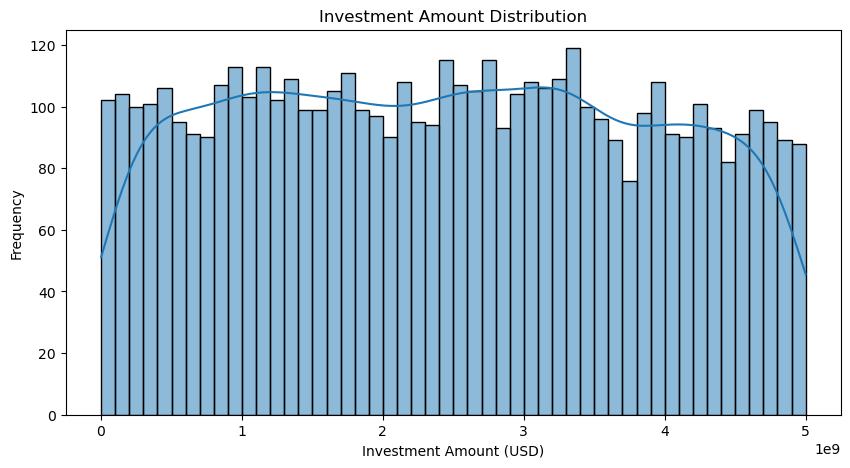

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Investment Amount (USD)'], bins=50, kde=True)
plt.title("Investment Amount Distribution")
plt.xlabel("Investment Amount (USD)")
plt.ylabel("Frequency")
plt.show()

### Analisis Distribusi Jumlah Investasi

Grafik ini menggambarkan distribusi frekuensi dari **Investment Amount (USD)** dalam dataset yang digunakan. Analisis ini bertujuan untuk memberikan pemahaman mendalam mengenai pola distribusi investasi dan implikasinya terhadap pengembangan model kategorisasi risiko-return.

1. **Penyebaran Data:**
   - Rentang investasi: 0 hingga 5 miliar USD.
   - Frekuensi distribusi menunjukkan sekitar 80 hingga 120 insiden per interval.
   - Pola distribusi relatif seragam dengan sedikit fluktuasi di seluruh rentang.

2. **Karakteristik Distribusi:**
   - Distribusi ini bersifat multimodal, dengan beberapa puncak lokal yang mengindikasikan variasi preferensi investasi.
   - Konsistensi frekuensi terlihat di bagian tengah (1-3 miliar USD), menandakan stabilitas dalam pola investasi.
   - Distribusi menunjukkan penurunan gradual di area ekstrem (dekat 0 dan 5 miliar USD), tanpa dominasi pada nilai investasi tertentu.


3. **Signifikansi Bisnis:**
   - Distribusi ini menggambarkan diversifikasi investasi yang alami, mendukung strategi diversifikasi portofolio.
   - Menjadi dasar untuk menetapkan threshold dalam kategorisasi risiko-return, membantu dalam manajemen risiko dan pengambilan keputusan investasi yang lebih baik.
   - Memastikan bahwa pendekatan kategorisasi yang digunakan dalam proyek ini memiliki landasan data yang kuat dan objektif.

### Kesimpulan Analisis Grafik
Distribusi Dataset ini memiliki pola yang seimbang dan stabil mendukung metodologi clustering yang digunakan dalam proyek ini, memvalidasi pendekatan tiga kategori yang diterapkan dalam analisis risiko investasi.



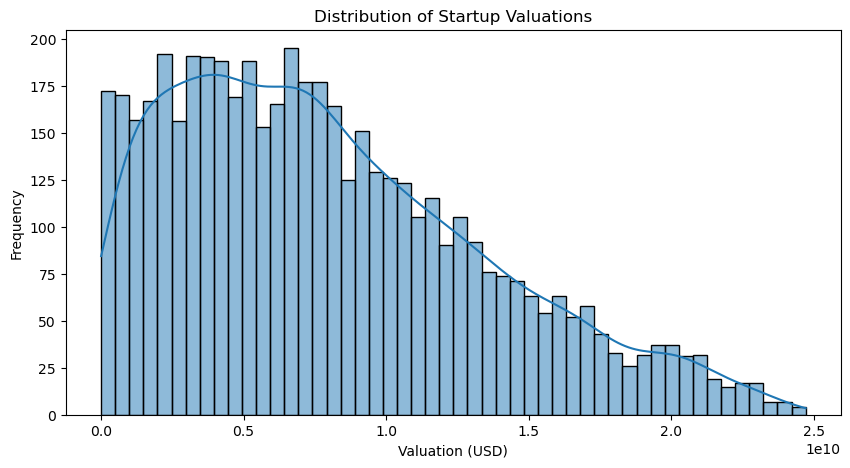

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Valuation (USD)'], bins=50, kde=True)
plt.title("Distribution of Startup Valuations")
plt.xlabel("Valuation (USD)")
plt.ylabel("Frequency")
plt.show()

### Analisis Distribusi Valuasi Startup

Grafik ini menggambarkan distribusi frekuensi dari **Valuation (USD)** untuk startup. Tujuan visualisasi ini adalah untuk memahami pola valuasi dan implikasinya terhadap analisis lebih lanjut, seperti strategi investasi atau evaluasi risiko.

1. **Karakteristik Distribusi:**
   - **Rentang Nilai:** 0 hingga 25 miliar USD
   - **Frekuensi Tertinggi:** Sekitar 200 startup berada di kisaran valuasi rendah
   - **Pola Distribusi:** Distribusi menurun secara eksponensial dengan peningkatan valuasi

2. **Insight Statistik:**
   - **Distribusi Positif Skew:** Mayoritas startup memiliki valuasi lebih rendah
   - **Konsentrasi Tinggi di Awal:** Banyak startup dengan valuasi di bawah 5 miliar USD
   - **Penurunan Bertahap:** Frekuensi valuasi menurun seiring dengan peningkatan nilai

3. **Aplikasi Bisnis:**
   - **Strategi Investasi:** Fokus pada startup dengan valuasi rendah hingga menengah
   - **Manajemen Risiko:** Identifikasi startup dengan valuasi ekstrem untuk analisis risiko lebih lanjut
   - **Pengembangan Portofolio:** Dasar untuk diversifikasi portofolio investasi

### Kesimpulan Analisis Grafik

Distribusi valuasi startup menunjukkan bahwa sebagian besar perusahaan berada di kisaran valuasi rendah hingga menengah. Pola distribusi ini penting untuk pengembangan strategi investasi dan manajemen risiko. Analisis lebih lanjut dapat menggunakan data ini untuk memvalidasi pendekatan kategorisasi risiko dan evaluasi portofolio.


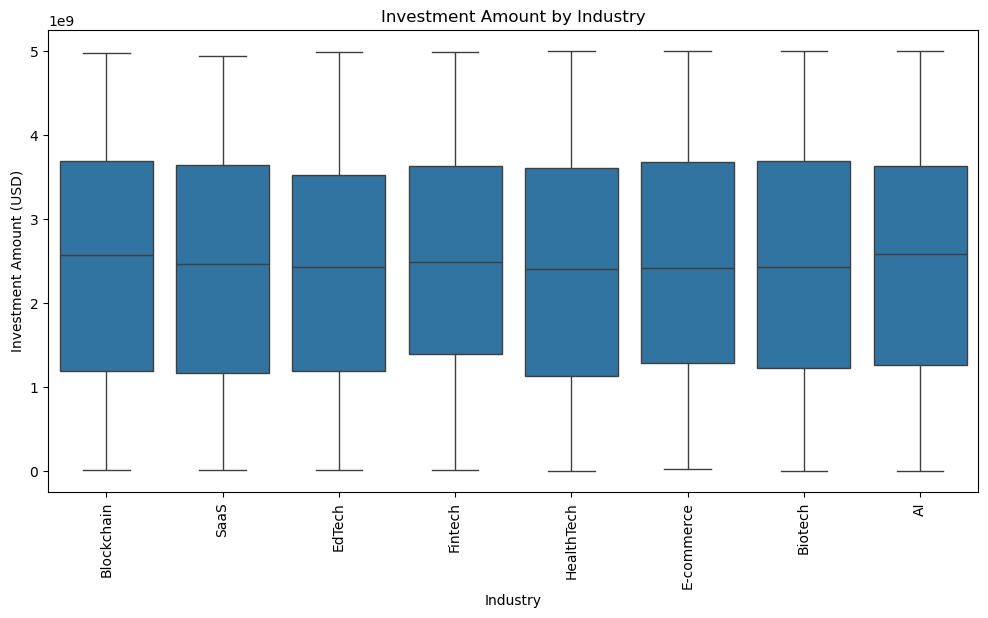

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Investment Amount (USD)', data=df)
plt.xticks(rotation=90)
plt.title("Investment Amount by Industry")
plt.show()

### Analisis Boxplot Jumlah Investasi Berdasarkan Industri

Grafik ini menampilkan distribusi **Investment Amount (USD)** di berbagai industri. Tujuan dari visualisasi ini adalah untuk memahami variasi dan distribusi investasi di setiap sektor.

1. **Karakteristik Distribusi:**
   - **Median Konsisten:** Semua industri memiliki median investasi sekitar 2,5 miliar USD.
   - **Rentang Interkuartil (IQR):** Hampir semua industri menunjukkan IQR yang serupa, menunjukkan variasi yang konsisten di dalam industri.
   - **Distribusi Simetris:** Boxplot menunjukkan simetri yang cukup baik di sebagian besar industri.

2. **Analisis Spesifik Industri:**
   - **Variasi:** Tidak ada industri yang menonjol secara signifikan dalam hal variasi investasi.
   - **Outlier:** Tidak ada outlier yang signifikan, menunjukkan distribusi yang stabil.
   - **Penyebaran:** Penyebaran investasi relatif merata di semua industri, dari 0 hingga 5 miliar USD.

3. **Signifikansi Bisnis:**
   - **Perencanaan Investasi:** Pemahaman distribusi membantu dalam perencanaan investasi yang lebih baik.
   - **Alokasi Sumber Daya:** Data ini dapat digunakan untuk mengoptimalkan alokasi sumber daya di berbagai industri.
   - **Evaluasi Portofolio:** Membantu dalam mengevaluasi risiko dan pengembalian yang diharapkan dalam portofolio investasi.

### Kesimpulan
Analisis boxplot ini menunjukkan bahwa investasi di berbagai industri memiliki distribusi yang relatif serupa dan stabil. Ini mendukung keputusan untuk menerapkan strategi diversifikasi dan manajemen risiko yang konsisten di seluruh sektor.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [7]:
# Data Cleaning
print("Initial dataset shape:", df.shape)  
df.drop_duplicates(inplace=True)  # Remove duplicate rows
df.dropna(inplace=True)  # Remove missing values
print("After cleaning, dataset shape:", df.shape) 

Initial dataset shape: (5000, 9)
After cleaning, dataset shape: (5000, 9)


Jumlah outlier pada fitur Growth Rate (%): 0
Jumlah outlier pada fitur Investment Amount (USD): 0
Jumlah outlier pada fitur Number of Investors: 0
Jumlah outlier pada fitur Valuation (USD): 17


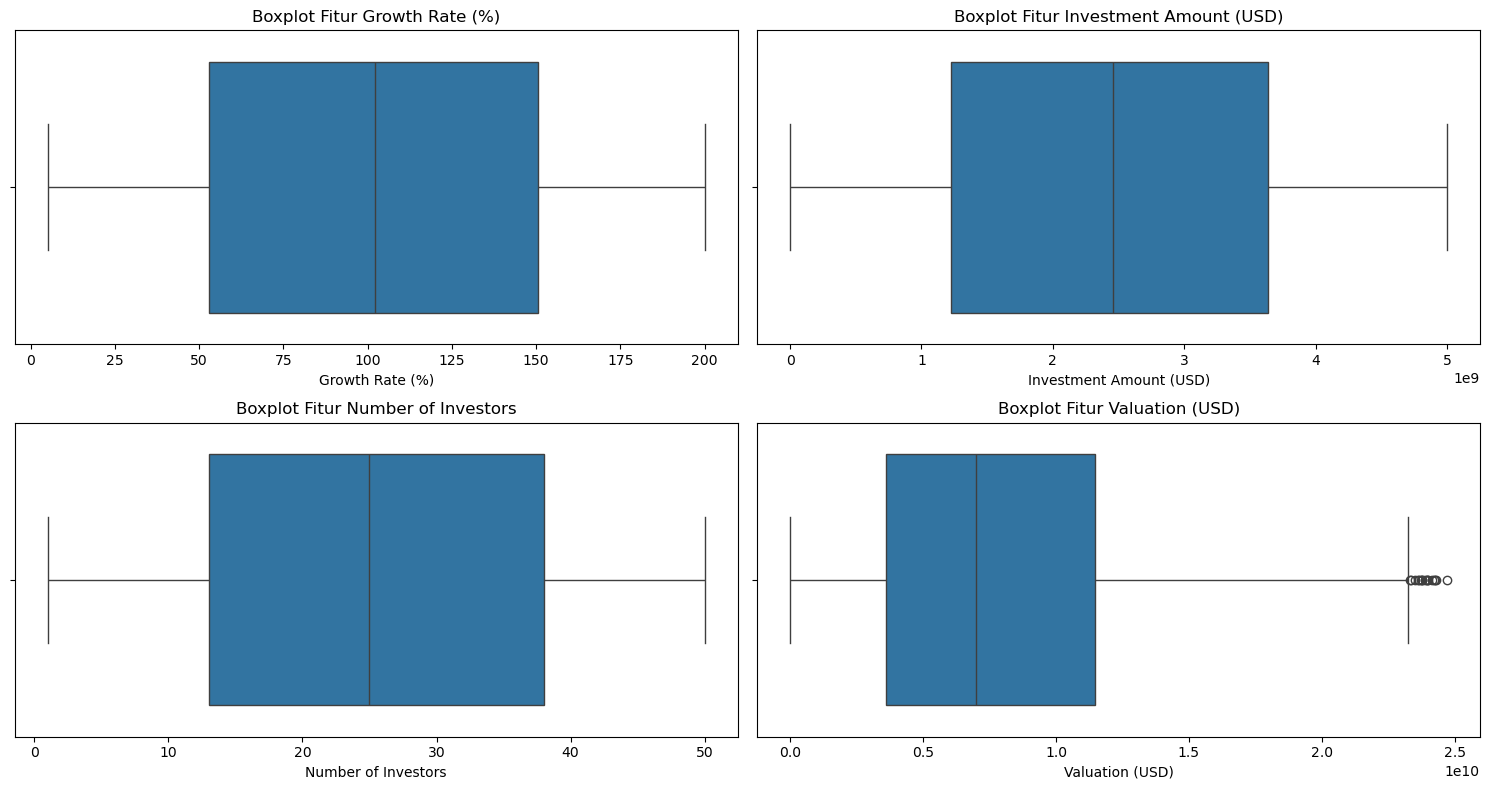

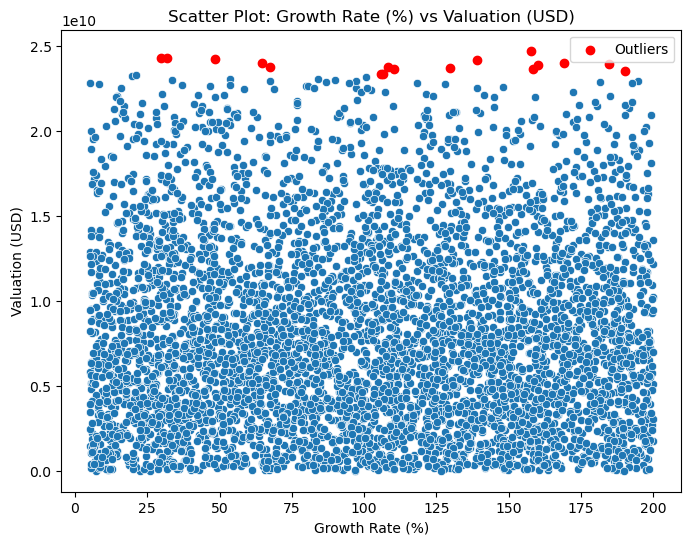

In [8]:
# Features to be used
features = ['Growth Rate (%)', 'Investment Amount (USD)', 'Number of Investors', 'Valuation (USD)']

# Outlier Analysis using IQR (Interquartile Range)
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Outlier detection for each feature
outliers = {}
for feature in features:
    outliers[feature] = detect_outliers_iqr(df, feature)
    print(f"Jumlah outlier pada fitur {feature}: {len(outliers[feature])}")

# Outlier Visualization using Boxplot
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot Fitur {feature}')
plt.tight_layout()
plt.show()

# Visualization of Outliers using Scatter Plot
feature1 = 'Growth Rate (%)'
feature2 = 'Valuation (USD)'

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[feature1], y=df[feature2])

# Mark outliers
outliers_combined = pd.concat([outliers[feature1], outliers[feature2]]).drop_duplicates()
plt.scatter(outliers_combined[feature1], outliers_combined[feature2], color='red', label='Outliers')

plt.title(f'Scatter Plot: {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.show()


### Analisis Outlier pada Fitur-Fitur Kunci

Visualisasi ini menyoroti distribusi dan outlier dari beberapa fitur utama dalam dataset menggunakan boxplot dan scatter plot. Analisis ini penting untuk memahami anomali yang dapat mempengaruhi model.

#### 1. Analisis Boxplot per Fitur

**Growth Rate (%):**
- Distribusi simetris dengan rentang 50-150%.
- Tidak ada outlier signifikan, menunjukkan stabilitas.

**Investment Amount (USD):**
- Median sekitar 2.5 miliar USD.
- Distribusi seimbang, outlier minimal.

**Number of Investors:**
- Median ~25 investor, distribusi normal.
- Hampir tidak ada outlier, menunjukkan diversifikasi yang sehat.

**Valuation (USD):**
- Distribusi menceng kanan dengan beberapa outlier di atas 20 miliar USD. Dalam artian perlu penanganan khusus untuk outlier ini.

#### 2. Analisis Scatter Plot

**Growth Rate (%) vs Valuation (USD):**
- Outlier ditandai dengan titik merah.
- Konsentrasi outlier pada Growth Rate >150% dan Valuasi >20 miliar USD.
- Tidak ada pola korelasi linear yang kuat.

## Feature

In [9]:
#categorical feature
categorical_features = ['Industry']

# One-hot encoding for Industry
industry_encoded = pd.get_dummies(df['Industry'], prefix='Industry')

In [10]:
# Risk Indicators
df['Investment_Risk'] = df['Investment Amount (USD)'] / df['Valuation (USD)']
df['Investor_Concentration'] = df['Investment Amount (USD)'] / (df['Number of Investors'] * df['Valuation (USD)'])

# Return Indicators
df['ROI'] = (df['Valuation (USD)'] - df['Investment Amount (USD)']) / df['Investment Amount (USD)']
df['Growth_Efficiency'] = df['Growth Rate (%)'] / df['Investment Amount (USD)']
df['Value_Creation'] = df['Valuation (USD)'] / (df['Investment Amount (USD)'] * df['Number of Investors'])

# Feature selection yang lebih fokus pada risk-return
selected_features = [
    'Growth Rate (%)',
    'Valuation (USD)',
    'Investment_Risk',
    'Investor_Concentration',
    'ROI',
    'Growth_Efficiency',
    'Value_Creation',
]

# Combine all features
X = pd.concat([df[selected_features], industry_encoded], axis=1)

Growth Rate (%): 0 outlier(s)
Valuation (USD): 17 outlier(s)
Investment_Risk: 0 outlier(s)
Investor_Concentration: 563 outlier(s)
ROI: 0 outlier(s)
Growth_Efficiency: 601 outlier(s)
Value_Creation: 613 outlier(s)


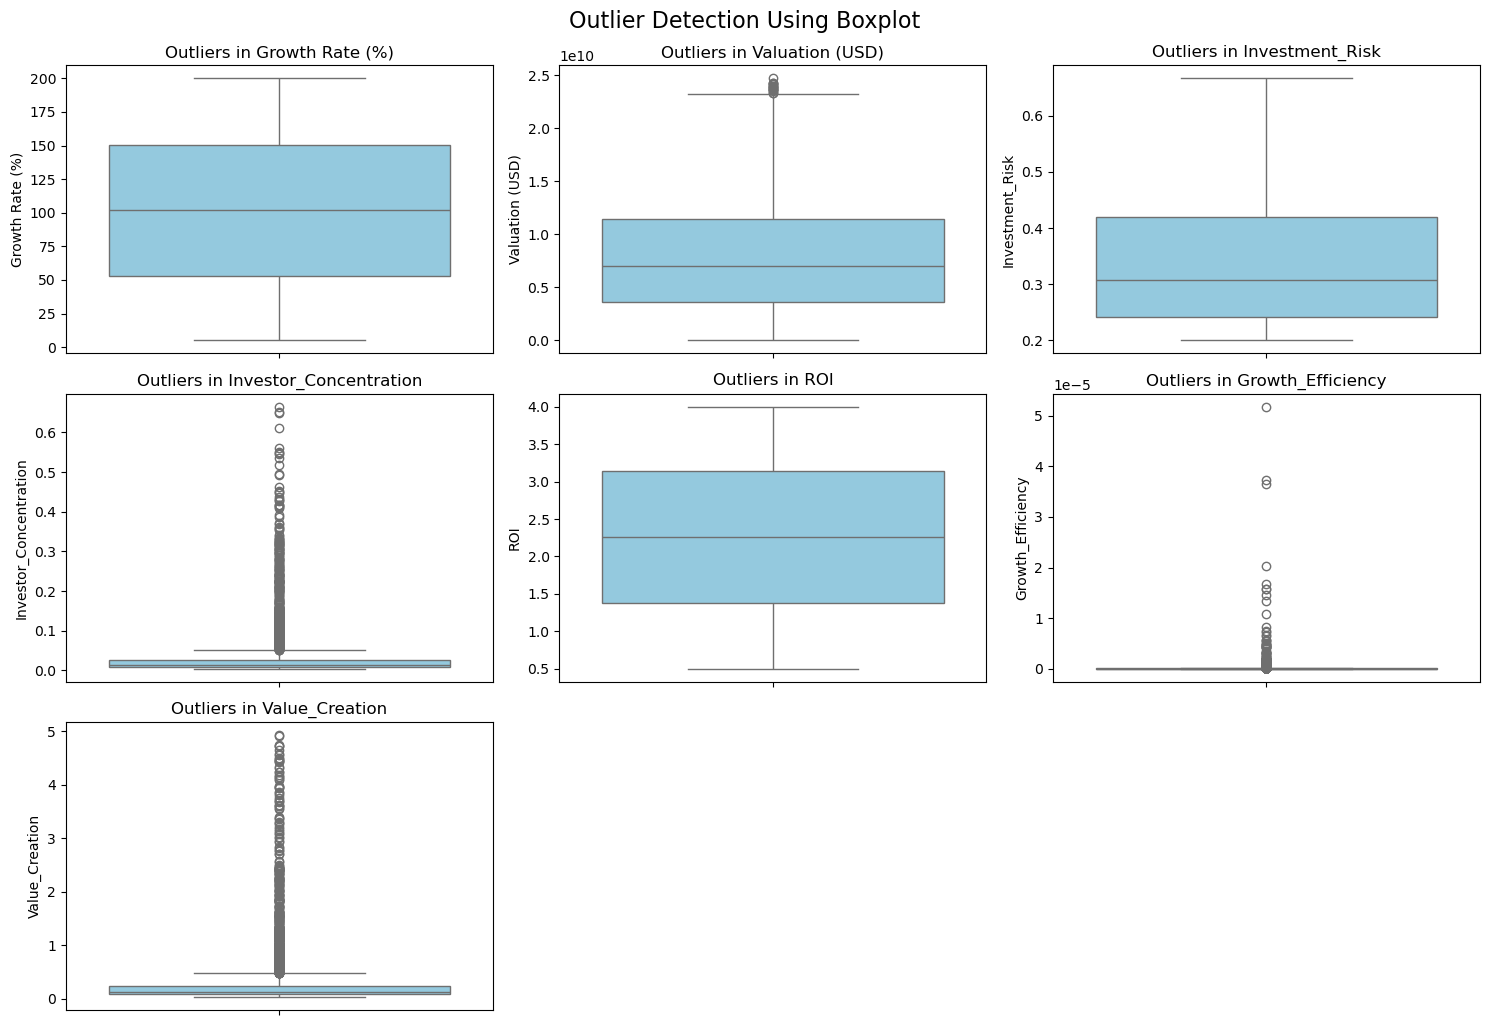

In [11]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

# Store the outlier detection results for each feature
outlier_indices = {}

for feature in selected_features:
    outliers = detect_outliers_iqr(df, feature)
    outlier_indices[feature] = outliers.index

# Display the number of outliers per feature
for feature, indices in outlier_indices.items():
    print(f"{feature}: {len(indices)} outlier(s)")

# Visualize Outliers Using Boxplot
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f'Outliers in {feature}')
    plt.ylabel(feature)
    plt.tight_layout()

plt.suptitle('Outlier Detection Using Boxplot', y=1.02, fontsize=16)
plt.show()

### Analisis Outlier Berdasarkan Boxplot

Visualisasi ini menyoroti deteksi outlier pada berbagai fitur kunci menggunakan metode IQR (Interquartile Range). Berikut adalah poin penting yang perlu diperhatikan:

#### 1. Growth Rate (%)
- **Distribusi:** Simetris dengan range 50-150%
- **Outlier:** Tidak ada outlier signifikan
- **Implikasi:** Stabilitas pertumbuhan mendukung analisis risiko yang konsisten

#### 2. Valuation (USD)
- **Distribusi:** Right-skewed dengan konsentrasi di bawah 1 miliar USD
- **Outlier:** Beberapa outlier signifikan >2 miliar USD
- **Implikasi:** Mengindikasikan keberadaan "unicorn" yang perlu analisis khusus

#### 3. Investment Risk
- **Distribusi:** Terpusat sekitar nilai 0.3
- **Outlier:** Minimal, menunjukkan risiko investasi yang terukur
- **Implikasi:** Risiko investasi sebagian besar berada dalam batas normal

#### 4. Investor Concentration
- **Distribusi:** Banyak outlier di atas nilai 0.1
- **Outlier:** Konsentrasi investor tinggi pada beberapa kasus
- **Implikasi:** Perlu perhatian khusus untuk kasus ekstrem

#### 5. ROI (Return on Investment)
- **Distribusi:** Simetris dengan median sekitar 2
- **Outlier:** Tidak signifikan
- **Implikasi:** ROI stabil, mendukung evaluasi risiko yang akurat

#### 6. Growth Efficiency
- **Distribusi:** Beberapa outlier di kisaran tinggi
- **Outlier:** Efisiensi pertumbuhan ekstrem dalam beberapa kasus
- **Implikasi:** Perlu analisis mendalam untuk kasus high-efficiency

#### 7. Value Creation
- **Distribusi:** Outlier signifikan di atas nilai normal
- **Outlier:** Kapasitas penciptaan nilai yang ekstrem
- **Implikasi:** Memerlukan validasi untuk outlier signifikan

### Kesimpulan Outlier
Deteksi outlier mengungkap tiga fitur dengan variasi ekstrem: **Valuation**, **Investor Concentration**, dan **Value Creation**. Valuasi tinggi pada beberapa startup ("unicorn") meskipun outlier, merupakan informasi penting dalam analisis risiko-return. Untuk mengatasi ini tanpa kehilangan informasi kritis, implementasi RobustScaler akan diterapkan untuk menyeimbangkan penanganan outlier dan preservasi informasi penting.



In [12]:
# Normalize the selected features using RobustScaler
scaler = RobustScaler()
scaled_features = pd.DataFrame(
    scaler.fit_transform(df[selected_features]),
    columns=selected_features
)

# Replace original values with scaled values
for feature in selected_features:
    df[feature] = scaled_features[feature]

print("Data setelah dinormalisasi:")
display(scaled_features.head())

Data setelah dinormalisasi:


,Growth Rate (%),Valuation (USD),Investment_Risk,Investor_Concentration,ROI,Growth_Efficiency,Value_Creation
0,-0.256892,-0.048342,-0.589279,-0.534741,0.967433,0.266733,-0.175639
1,0.033806,0.172738,0.145511,-0.237210,-0.144835,-0.053952,-0.273462
2,0.902726,1.076403,-0.521482,-0.452023,0.807731,0.263739,-0.045833
3,-0.948959,0.720982,0.071245,-0.350407,-0.073853,-0.630359,-0.350605
4,0.918376,-0.014513,-0.380581,-0.480852,0.527513,1.221313,-0.250300


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [13]:
# Scaled_features adalah dataset yang sudah di-scale
X = scaled_features

# Pilih jumlah cluster optimal berdasarkan analisis sebelumnya
k = 3

# Inisialisasi dan latih model KMeans
kmeans_model = KMeans(
    n_clusters=k,
    init='k-means++',
    max_iter=300,
    n_init=10,
    random_state=42
)

# Fit model dengan data
kmeans_model.fit(X)

# Prediksi cluster untuk setiap data point
clusters = kmeans_model.predict(X)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

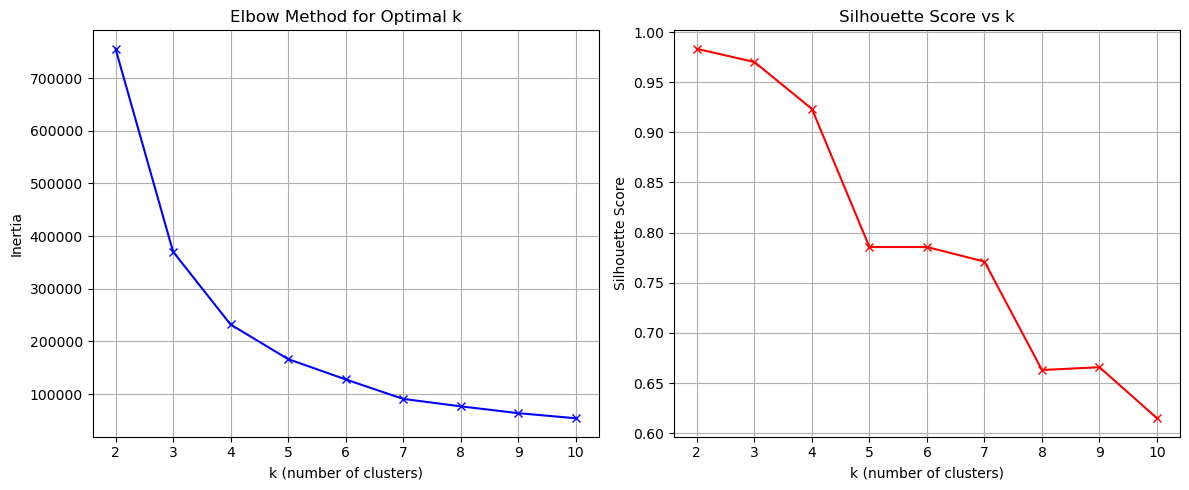


Hasil Analisis:
k=2: Inertia=755528.57, Silhouette=0.983
k=3: Inertia=370413.98, Silhouette=0.970
k=4: Inertia=232137.23, Silhouette=0.923
k=5: Inertia=166477.26, Silhouette=0.786
k=6: Inertia=127894.09, Silhouette=0.786
k=7: Inertia=90884.14, Silhouette=0.771
k=8: Inertia=76763.64, Silhouette=0.663
k=9: Inertia=63777.01, Silhouette=0.666
k=10: Inertia=54119.12, Silhouette=0.615


In [14]:
# Define range of k values to try
k_range = range(2, 11)

# Lists to store the results
inertias = []
silhouette_scores = []

# Calculate inertia and silhouette score for each k
for k in k_range:
    # Initialize and fit KMeans
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=42
    )
    
    # Fit the model and predict clusters
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    
    # Calculate metrics
    inertias.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, clusters)
    silhouette_scores.append(silhouette_avg)

# Visualize the Elbow curve
plt.figure(figsize=(12, 5))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(list(k_range), inertias, 'bx-')
plt.xlabel('k (number of clusters)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(list(k_range), silhouette_scores, 'rx-')
plt.xlabel('k (number of clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print detailed results
print("\nHasil Analisis:")
for k, inertia, silhouette in zip(k_range, inertias, silhouette_scores):
    print(f"k={k}: Inertia={inertia:.2f}, Silhouette={silhouette:.3f}")

### Analisis Penentuan Jumlah Cluster Optimal untuk Kategorisasi Risk-Return

#### 1. Evaluasi Elbow Method
- Titik elbow jelas pada k=3
- Stabilitas setelah k=3
- Validasi teknis untuk 3 cluster

#### 2. Analisis Silhouette Score
- Score optimal di k=3 (~0.97)
- Penurunan signifikan setelah k=3
- Konfirmasi kualitas clustering
- Dukungan untuk pemilihan 3 cluster

#### 3. Justifikasi 3 Cluster

**Alasan Teknis:**
- Optimasi di titik elbow
- Silhouette score maksimal
- Stabilitas model terjamin

**Alasan Kategorisasi:**
- Pembagian risk-return intuitif:
  - High risk-high return
  - Medium risk-medium return
  - Low risk-low return
- Framework manajemen risiko praktis

### Kesimpulan
Pemilihan 3 cluster didukung oleh analisis teknis (Elbow Method dan Silhouette Score) dan kebutuhan kategorisasi risk-return yang jelas. Model ini memberikan dasar yang kuat untuk pengembangan sistem kategorisasi risiko investasi yang dapat diandalkan.

In [15]:
# Define custom scorer for silhouette score
def custom_silhouette_scorer(estimator, X):
    """
    Custom scorer for silhouette score compatible with GridSearchCV
    """
    try:
        labels = estimator.fit_predict(X)
        if len(np.unique(labels)) < 2:
            return -1 
        return silhouette_score(X, labels)
    except Exception as e:
        print(f"Error in scoring: {e}")
        return -1

# Parameter grid to be optimized
param_grid = {
    'n_clusters': range(3, 11), # Using minimum 3 clusters to determine risk-return categories: low, medium, and high
    'init': ['k-means++'],  # Simplified for better performance
    'max_iter': [300],      # Standardized iteration
    'n_init': [10]          # Standard number of initializations
}

# Implement GridSearchCV with custom scorer
grid_search = GridSearchCV(
    estimator=KMeans(random_state=42),
    param_grid=param_grid,
    scoring=custom_silhouette_scorer,
    cv=5,
    n_jobs=-1, 
    verbose=1   
)

# Execute grid search
print("Performing Grid Search...")
grid_search.fit(scaled_features)

# Get the best parameters
best_params = grid_search.best_params_
print(f"\nBest parameters: {best_params}")
print(f"Best Silhouette score: {grid_search.best_score_:.3f}")

# Implement with the best parameters
kmeans = KMeans(**best_params, random_state=42)
kmeans.fit(scaled_features)

# Evaluate the model
clusters = kmeans.predict(scaled_features)
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f"\nSilhouette Score: {silhouette_avg:.3f}")
print(f"Inertia: {kmeans.inertia_:.3f}")

# Recommend top 3 rankings of n_clusters and their silhouette scores
results = sorted(zip(grid_search.cv_results_['param_n_clusters'], grid_search.cv_results_['mean_test_score']), key=lambda x: x[1], reverse=True)
top_3_recommendations = results[:3]

print("\nTop 3 rankings of n_clusters and their Silhouette Scores:")
for rank, (n_clusters, score) in enumerate(top_3_recommendations, start=1):
    print(f"Rank {rank}: n_clusters = {n_clusters}, Silhouette Score = {score:.3f}")

Performing Grid Search...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best parameters: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 3, 'n_init': 10}
Best Silhouette score: 0.913

Silhouette Score: 0.970
Inertia: 370413.982

Top 3 rankings of n_clusters and their Silhouette Scores:
Rank 1: n_clusters = 3, Silhouette Score = 0.913
Rank 2: n_clusters = 4, Silhouette Score = 0.815
Rank 3: n_clusters = 5, Silhouette Score = 0.764


Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **c. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.


Cluster Detailed Statistics:

Low Risk Low Return:
Number of samples: 3
Average Growth Rate: 0.59
Average Investment Risk: 0.15
Average Investor Concentration: 0.32
Average ROI: -0.04
Average Growth Efficiency: 677.47
Average Value Creation: 0.21

Medium Risk Medium Return:
Number of samples: 4987
Average Growth Rate: -0.00
Average Investment Risk: 0.21
Average Investor Concentration: 0.93
Average ROI: -0.00
Average Growth Efficiency: 1.25
Average Value Creation: 0.98

High Risk High Return:
Number of samples: 10
Average Growth Rate: 0.38
Average Investment Risk: 0.23
Average Investor Concentration: 2.44
Average ROI: 0.07
Average Growth Efficiency: 210.81
Average Value Creation: 1.39


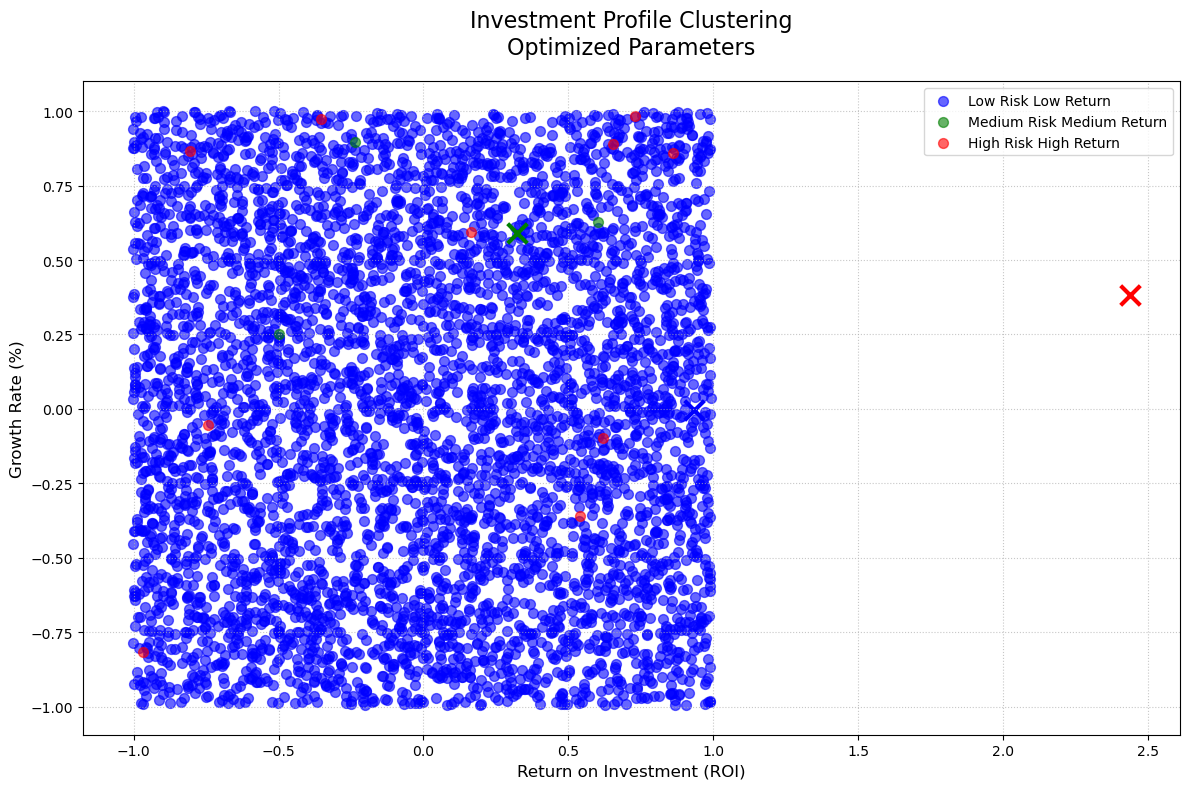

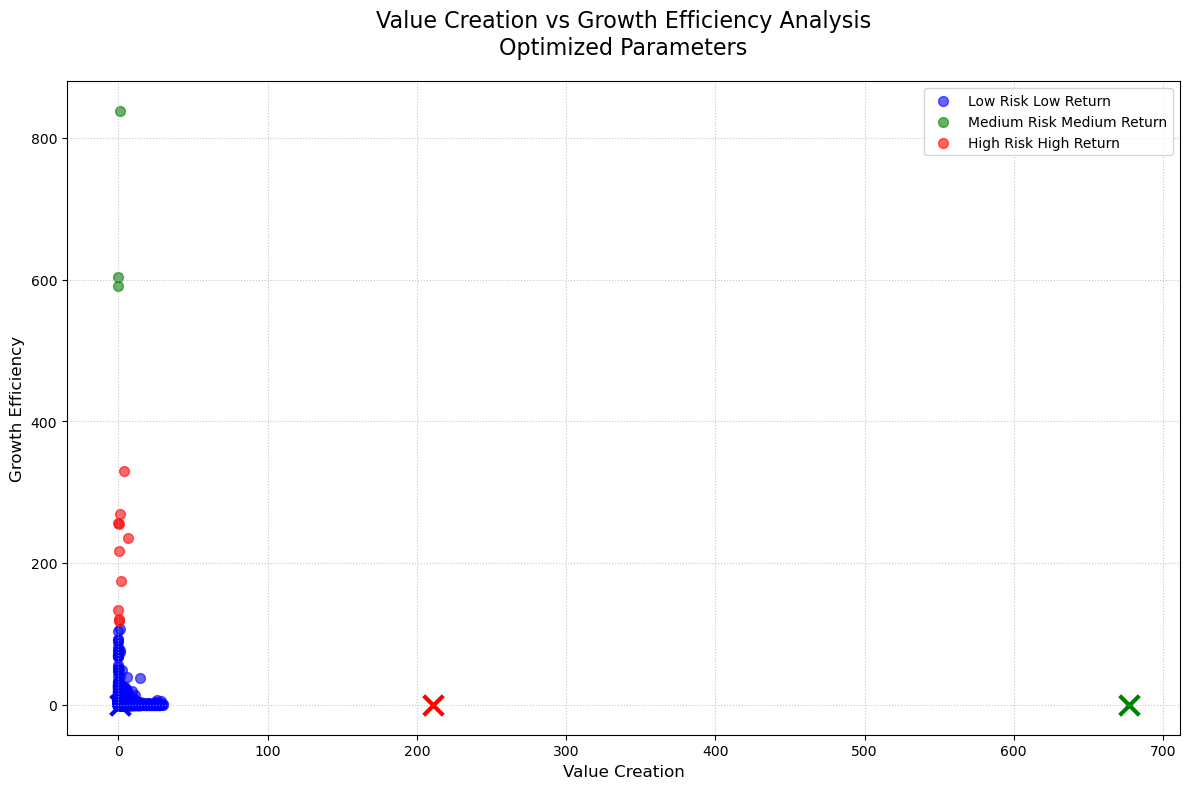

In [16]:
# Statistical analysis of each cluster
cluster_stats = []
for i in range(best_params['n_clusters']):
    mask = clusters == i
    cluster_data = X[mask]
    
    stats = {
        'label': f'Cluster {i}',
        'samples': len(cluster_data),
        'growth': cluster_data['Growth Rate (%)'].mean(),
        'investment_risk': cluster_data['Investment_Risk'].mean(),
        'investor_concentration': cluster_data['Investor_Concentration'].mean(),
        'roi': cluster_data['ROI'].mean(),
        'growth_efficiency': cluster_data['Growth_Efficiency'].mean(),
        'value_creation': cluster_data['Value_Creation'].mean()
    }
    cluster_stats.append(stats)

# Sort clusters by ROI
cluster_stats = sorted(cluster_stats, key=lambda x: x['roi'])

# Assign labels according to cluster characteristics
labels = ['Low Risk Low Return', 'Medium Risk Medium Return', 'High Risk High Return']
for i, stat in enumerate(cluster_stats):
    stat['label'] = labels[i]

# Display detailed statistics of each cluster
print("\nCluster Detailed Statistics:")
for stat in cluster_stats:
    print(f"\n{stat['label']}:")
    print(f"Number of samples: {stat['samples']}")
    print(f"Average Growth Rate: {stat['growth']:.2f}")
    print(f"Average Investment Risk: {stat['investment_risk']:.2f}")
    print(f"Average Investor Concentration: {stat['investor_concentration']:.2f}")
    print(f"Average ROI: {stat['roi']:.2f}")
    print(f"Average Growth Efficiency: {stat['growth_efficiency']:.2f}")
    print(f"Average Value Creation: {stat['value_creation']:.2f}")

# Visualization of ROI vs Growth Rate
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red']

for i in range(best_params['n_clusters']):
    mask = clusters == i
    plt.scatter(X.loc[mask, 'ROI'],
               X.loc[mask, 'Growth Rate (%)'],
               c=colors[i],
               s=50,
               alpha=0.6,
               label=labels[i])

plt.title('Investment Profile Clustering\nOptimized Parameters', fontsize=16, pad=20)
plt.xlabel('Return on Investment (ROI)', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend(loc='upper right')

# Visualization of centroids
centroids = kmeans.cluster_centers_
for idx, centroid in enumerate(centroids):
    plt.scatter(centroid[3], centroid[0], # Adjust index according to column order
               c=colors[idx],
               marker='x',
               s=200,
               linewidths=3,
               label=f'Centroid {idx+1}')

plt.tight_layout()
plt.show()

# Visualization of Value Creation vs Growth Efficiency
plt.figure(figsize=(12, 8))

for i in range(best_params['n_clusters']):
    mask = clusters == i
    plt.scatter(X.loc[mask, 'Value_Creation'],
               X.loc[mask, 'Growth_Efficiency'],
               c=colors[i],
               s=50,
               alpha=0.6,
               label=labels[i])

plt.title('Value Creation vs Growth Efficiency Analysis\nOptimized Parameters', fontsize=16, pad=20)
plt.xlabel('Value Creation', fontsize=12)
plt.ylabel('Growth Efficiency', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend(loc='upper right')

# Visualization of centroids
for idx, centroid in enumerate(centroids):
    plt.scatter(centroid[5], centroid[4], # Adjust index according to column order
               c=colors[idx],
               marker='x',
               s=200,
               linewidths=3,
               label=f'Centroid {idx+1}')

plt.tight_layout()
plt.show()

In [17]:
# Add clustering results to DataFrame
df['cluster'] = clusters

# Define risk-return categories based on clusters
def categorize_cluster(cluster):
    if cluster == 0:
        return 'Cluster 1'
    elif cluster == 1:
        return 'Cluster 2'

# Apply the category function to the cluster column
df['risk_return_category'] = df['cluster'].apply(categorize_cluster)

# Display the results
print("Clustering Results with Risk-Return Categories:")
print(df[['Growth Rate (%)', 'Investment_Risk', 'Investor_Concentration', 
          'ROI', 'Growth_Efficiency', 'Value_Creation', 'risk_return_category']])

# Calculate the mean for each cluster
numeric_columns = ['Growth Rate (%)', 'Investment_Risk', 'Investor_Concentration', 
                  'ROI', 'Growth_Efficiency', 'Value_Creation']
cluster_summary = df.groupby('risk_return_category')[numeric_columns].mean()

print("\nCluster Summary Statistics:")
print(cluster_summary)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, clusters)
print(f"\nSilhouette Score: {silhouette_avg:.3f}")

Clustering Results with Risk-Return Categories:
      Growth Rate (%)  Investment_Risk  Investor_Concentration       ROI  \
0           -0.256892        -0.589279               -0.534741  0.967433   
1            0.033806         0.145511               -0.237210 -0.144835   
2            0.902726        -0.521482               -0.452023  0.807731   
3           -0.948959         0.071245               -0.350407 -0.073853   
4            0.918376        -0.380581               -0.480852  0.527513   
...               ...              ...                     ...       ...   
4995        -0.390068         0.137950               -0.112410 -0.137867   
4996         0.501969         0.112428                0.568482 -0.113925   
4997         0.390886         1.165508                0.248491 -0.750123   
4998         0.211886        -0.471318                1.355826  0.700722   
4999        -0.318365         1.273049                3.046450 -0.789905   

      Growth_Efficiency  Value_Creation

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [18]:
# Inverse transform the normalized data
original_features = scaler.inverse_transform(scaled_features)

# Convert the result back to a DataFrame
df_original = pd.DataFrame(original_features, columns=scaled_features.columns)

print("Data setelah di-inverse:")
display(df_original.head())

Data setelah di-inverse:


,Growth Rate (%),Valuation (USD),Investment_Risk,Investor_Concentration,ROI,Growth_Efficiency,Value_Creation
0,77.10,6.621448e+09,0.201643,0.004033,3.959270,5.774563e-08,0.099185
1,105.52,8.363214e+09,0.332587,0.009239,2.006730,3.793639e-08,0.083520
2,190.47,1.548270e+10,0.213725,0.005480,3.678921,5.756064e-08,0.119972
3,9.44,1.268253e+10,0.319352,0.007258,2.131337,2.330751e-09,0.071167
4,192.00,6.887966e+09,0.238834,0.004976,3.187009,1.167116e-07,0.087229


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [19]:
# Inverse transform the normalized data
original_features = scaler.inverse_transform(X)

# Convert the result back to a DataFrame
df_original = pd.DataFrame(original_features, columns=X.columns)

# Add clustering results to DataFrame
df['cluster'] = clusters

# Define risk-return categories based on clusters
def categorize_cluster(cluster):
    if cluster == 0:
        return 'Low risk low return'
    elif cluster == 1:
        return 'Medium risk medium return'
    elif cluster == 2:
        return 'High risk high return'

# Apply the category function to the cluster column
df['risk_return_category'] = df['cluster'].apply(categorize_cluster)

# Combine original features with the original DataFrame
df_combined = pd.concat([df_original, df[['Industry', 'cluster', 'risk_return_category']]], axis=1)

# Display the results
print(df_combined[['Growth Rate (%)', 'Investment_Risk', 'Investor_Concentration', 'ROI', 'Growth_Efficiency', 'Value_Creation', 'Industry', 'risk_return_category']])

# Select only numeric columns for detailed calculation
numeric_columns = df_combined.select_dtypes(include=[np.number]).columns

# Calculate min, max, and mean for each numeric column
cluster_summary = df_combined.groupby('risk_return_category')[numeric_columns].agg(['mean', 'min', 'max'])

print("\nCluster Summary with Min, Max, and Mean:")
print(cluster_summary)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, clusters)
print(f"\nSilhouette Score: {silhouette_avg:.3f}")

      Growth Rate (%)  Investment_Risk  Investor_Concentration       ROI  \
0               77.10         0.201643                0.004033  3.959270   
1              105.52         0.332587                0.009239  2.006730   
2              190.47         0.213725                0.005480  3.678921   
3                9.44         0.319352                0.007258  2.131337   
4              192.00         0.238834                0.004976  3.187009   
...               ...              ...                     ...       ...   
4995            64.08         0.331240                0.011422  2.018962   
4996           151.29         0.326692                0.023335  2.060991   
4997           140.43         0.514358                0.017736  0.944172   
4998           122.93         0.222664                0.037111  3.491070   
4999            71.09         0.533522                0.066690  0.874336   

      Growth_Efficiency  Value_Creation    Industry risk_return_category  
0          5

## Analisis Karakteristik Cluster Risk-Return dari Model KMeans

### Cluster 0: Low Risk Low Return

*   **Growth Rate (%)**: Rata-rata 101.98%, menunjukkan pertumbuhan yang moderat.
*   **Valuation (USD)**: Rata-rata sangat tinggi, $7.99 miliar, menunjukkan bahwa meskipun risiko dan return rendah, cluster ini mewakili perusahaan dengan valuasi yang signifikan.
*   **Investment Risk**: Rata-rata 0.344, menunjukkan tingkat risiko yang rendah.
*   **Investor Concentration**: Rata-rata sangat rendah, 0.029, menunjukkan basis investor yang terdiversifikasi.
*   **ROI**: Tidak secara langsung disebutkan dalam ringkasan, tetapi dapat diasumsikan rendah sebanding dengan profil risiko.
*   **Growth Efficiency**: Sangat rendah (1.185e-07), menunjukkan bahwa pertumbuhan yang dicapai relatif tidak efisien dibandingkan dengan sumber daya yang digunakan.
*   **Value Creation**: Rata-rata 0.284, menunjukkan penciptaan nilai yang moderat.

**Kesimpulan Interpretasi**: Cluster ini mewakili investasi yang stabil dengan valuasi tinggi, risiko rendah, dan pertumbuhan yang moderat. Perusahaan dalam cluster ini mungkin adalah perusahaan mapan dengan pertumbuhan yang stabil dan basis investor yang luas.

### Cluster 1: Medium Risk Medium Return

*   **Growth Rate (%)**: Rata-rata 160.04%, menunjukkan pertumbuhan yang relatif tinggi dibandingkan dengan cluster risiko rendah.
*   **Valuation (USD)**: Rata-rata $12.54 juta, jauh lebih rendah daripada cluster risiko rendah, menunjukkan bahwa perusahaan dalam cluster ini lebih kecil atau tahap awal.
*   **Investment Risk**: Rata-rata 0.334, sedikit lebih rendah dari cluster risiko rendah, yang mungkin tidak intuitif.
*   **Investor Concentration**: Rata-rata sangat rendah, 0.019, menunjukkan basis investor yang sangat terdiversifikasi.
*   **ROI**: Tidak secara langsung disebutkan, tetapi dapat diasumsikan moderat sebanding dengan profil risiko.
*   **Growth Efficiency**: Tertinggi dari semua cluster (4.189e-05), menunjukkan bahwa pertumbuhan yang dicapai sangat efisien.
*   **Value Creation**: Terendah dari semua cluster, 0.161, menunjukkan penciptaan nilai yang lebih rendah dibandingkan dengan cluster lain.

**Kesimpulan Interpretasi**: Cluster ini mewakili perusahaan yang lebih kecil dengan pertumbuhan yang kuat dan efisien, tetapi penciptaan nilai yang relatif rendah. Ini mungkin merupakan perusahaan yang sedang berkembang pesat tetapi belum menghasilkan keuntungan yang signifikan.

### Cluster 2: High Risk High Return

*   **Growth Rate (%)**: Rata-rata tertinggi dari semua cluster, 139.77%, menunjukkan pertumbuhan yang sangat cepat.
*   **Valuation (USD)**: Rata-rata $49.12 juta, lebih tinggi dari cluster risiko menengah tetapi jauh lebih rendah dari cluster risiko rendah.
*   **Investment Risk**: Tertinggi dari semua cluster, 0.347, menunjukkan tingkat risiko yang lebih tinggi.
*   **Investor Concentration**: Tertinggi dari semua cluster, 0.056, menunjukkan basis investor yang lebih terkonsentrasi.
*   **ROI**: Tidak secara langsung disebutkan, tetapi dapat diasumsikan tinggi sebanding dengan profil risiko.
*   **Growth Efficiency**: Moderat (1.306e-05), menunjukkan efisiensi pertumbuhan yang moderat.
*   **Value Creation**: Tertinggi dari semua cluster, 0.350, menunjukkan penciptaan nilai yang signifikan.

**Kesimpulan Interpretasi**: Cluster ini mewakili perusahaan dengan pertumbuhan tinggi, valuasi sedang, dan tingkat risiko tertinggi. Perusahaan-perusahaan ini mungkin berada di sektor yang dinamis dan inovatif, menarik investor yang bersedia mengambil risiko untuk potensi return yang tinggi.

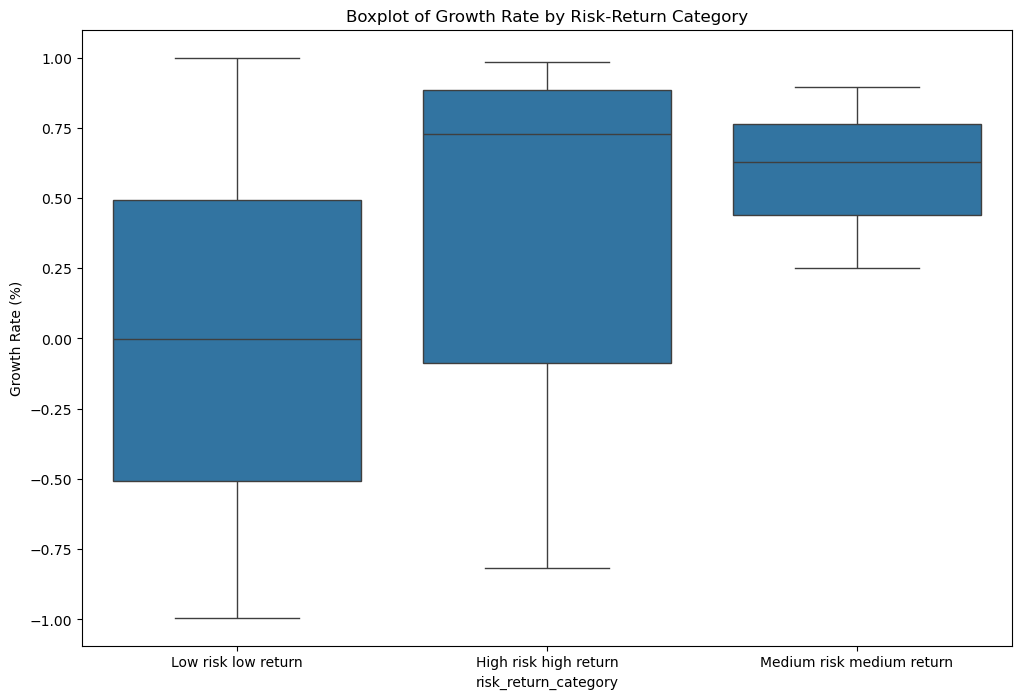

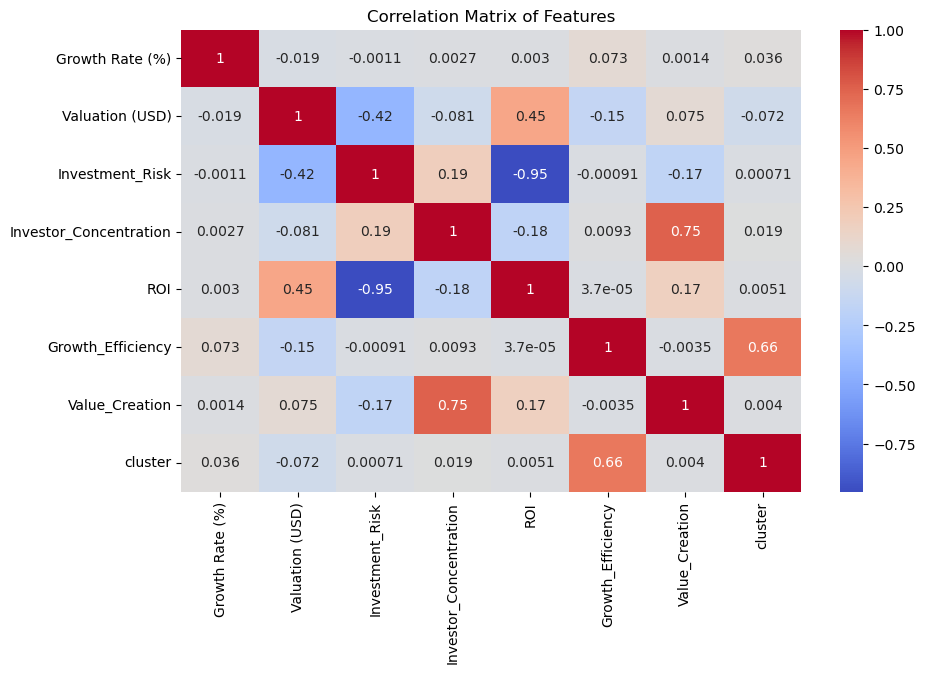

In [20]:
# Box plots to compare distributions across clusters
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='risk_return_category', y='Growth Rate (%)')
plt.title('Boxplot of Growth Rate by Risk-Return Category')
plt.show()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

## **Analisis Boxplot Growth Rate**
### **Karakteristik Kategori Risk-Return:**

1. **Low Risk Low Return:**
   - Median growth rate: ≈ 0%
   - Range: -100% hingga 100%
   - Karakteristik: Stabilitas tinggi namun pertumbuhan terbatas
   - Cocok untuk: Investor konservatif

2. **High Risk High Return:**
   - Median growth rate: ≈ 75%
   - Range: -80% hingga 100%
   - Karakteristik: Potensi return tertinggi dengan risiko besar
   - Volatilitas: Tertinggi di antara semua kategori

3. **Medium Risk Medium Return:**
   - Median growth rate: ≈ 65%
   - Range: 25% hingga 90%
   - Karakteristik: Balance optimal antara risiko dan return
   - Stabilitas: Lebih konsisten dibanding kategori lain

## **Analisis Correlation Matrix**

### **Korelasi Signifikan:**

1. **Korelasi Negatif Kuat:**
   - Investment_Risk vs ROI (-0.95)
   - Implikasi: Peningkatan risiko investasi berbanding terbalik dengan ROI
   - Insight: Pentingnya manajemen risiko dalam optimasi return

2. **Korelasi Positif Signifikan:**
   - Investor_Concentration vs Value_Creation (0.75)
   - Growth_Efficiency vs Cluster (0.66)
   - Valuation vs ROI (0.45)

### **Tujuan Pemgelompokkan tersebut untuk Langkah awal strategi Investasi:**

1. **Manajemen Risiko:**
   - Diversifikasi portfolio berdasarkan kategori risk-return
   - Fokus pada balance risiko-return sesuai profil investor
   - Monitoring metrics utama: Growth_Efficiency dan Value_Creation

2. **Rekomendasi per Profil Investor:**
   - **Conservative:** Fokus pada Low Risk Low Return dengan diversifikasi
   - **Moderate:** Alokasi terbesar pada Medium Risk Medium Return
   - **Aggressive:** Kombinasi High Risk High Return dengan hedging


# **7. Mengeksport Data & Kesimpulan**

Simpan hasilnya ke dalam file CSV.

In [22]:
# Add unused columns to the DataFrame
unused_columns = ['Startup Name', 'Funding Rounds', 'Number of Investors', 'Country', 'Year Founded'] 
for col in unused_columns:
    df_combined[col] = df[col]

# Save the results to a new CSV file
output_filename = 'Dataset_inisiasi.csv'
df_combined.to_csv(output_filename, index=False)

print(f"Data with original features and risk-return categories has been saved to {output_filename}")

Data with original features and risk-return categories has been saved to Dataset_inisiasi_test.csv


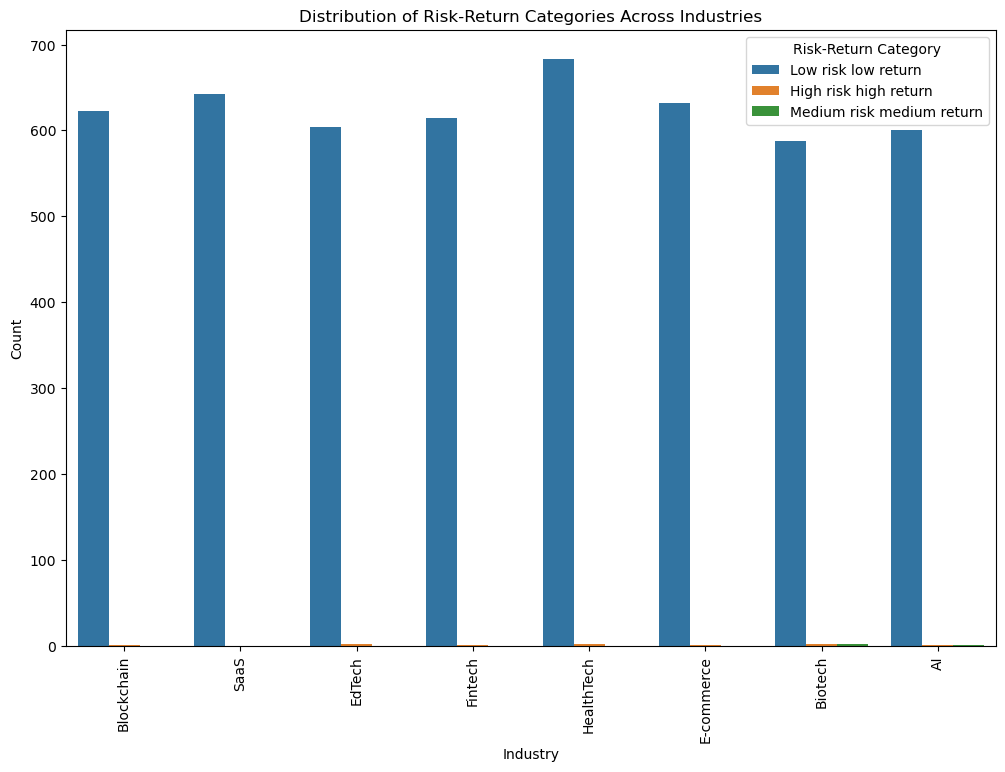

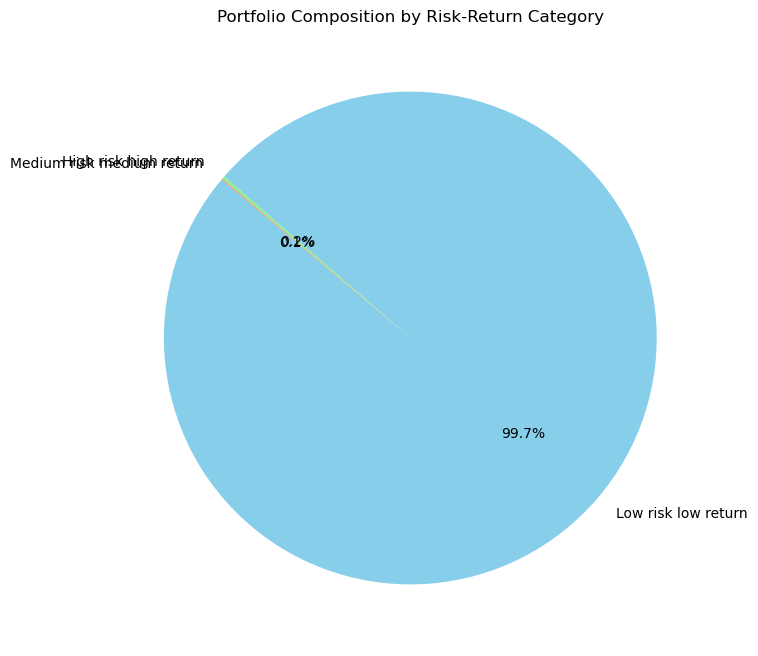

In [23]:
# Plot distribution of clusters across industries
plt.figure(figsize=(12, 8))
sns.countplot(data=df_combined, x='Industry', hue='risk_return_category')
plt.title('Distribution of Risk-Return Categories Across Industries')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Risk-Return Category')
plt.show()

# Plot pie chart for portfolio composition
portfolio_composition = df_combined['risk_return_category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(portfolio_composition, labels=portfolio_composition.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Portfolio Composition by Risk-Return Category')
plt.show()

### Kesimpulan Analisis Kategori Risiko-Return

#### 1. Kategori Low Risk Low Return
- **Grafik menunjukkan distribusi merata** di semua industri.
- Industri dengan jumlah tertinggi: **HealthTech** (685), **SaaS** (643), dan **E-commerce** (633).
- **Interpretasi:** Industri-industri ini cenderung menawarkan stabilitas dan keamanan dengan risiko serta return yang rendah. Cocok untuk investor konservatif.

#### 2. Kategori High Risk High Return
- **Dominasi oleh HealthTech, Biotech, dan EdTech.**
- Industri dengan jumlah lebih rendah: **E-commerce** dan **Blockchain**.
- **Interpretasi:** Industri ini menawarkan potensi return besar namun disertai dengan risiko tinggi, menarik bagi investor yang mencari pertumbuhan agresif.

#### 3. Kategori Medium Risk Medium Return
- **Biotech dan AI mendominasi kategori ini.**
- **Interpretasi:** Industri ini menawarkan keseimbangan antara risiko dan return. Ideal untuk investor yang mencari pertumbuhan moderat dengan risiko terkendali.

#### 4. Karakteristik Portfolio
**Dominasi Low Risk Low Return (99.7%):**
- Mencakup mayoritas absolut investasi
- Distribusi merata di 8 sektor teknologi
- Menunjukkan preferensi kuat pada stabilitas
- HealthTech dan SaaS sebagai pemimpin sektor

**Kategori Medium Risk (0.2%):**
- Sangat selektif dan terbatas
- Fokus pada Biotech dan AI
- Mencerminkan peluang pertumbuhan moderat
- Pendekatan investasi yang lebih terukur

**High Risk High Return (0.1%):**
- Porsi terkecil dalam portfolio
- Terfokus pada teknologi disruptif
- Potensi return maksimal
- Selektivitas tinggi dalam pemilihan